In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = yf.download(a, start = '2010-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2025-06-17,158.520004,5982.720215
2025-06-18,158.020004,5980.870117
2025-06-20,159.080002,5967.839844
2025-06-23,161.029999,6025.169922
2025-06-24,160.199997,6069.750000


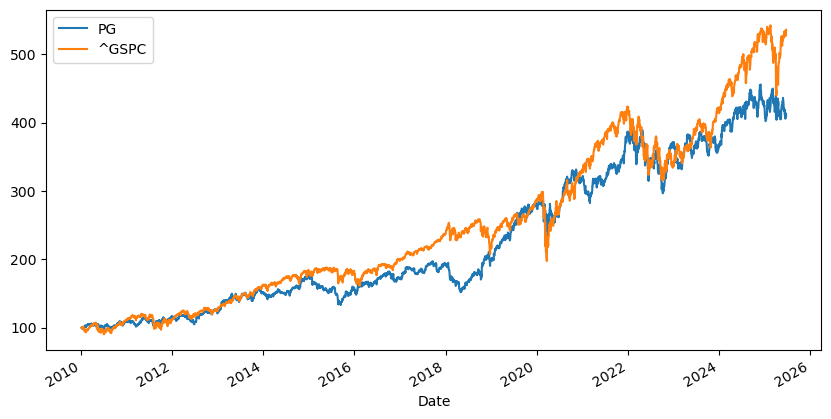

In [5]:
(pf_data/ pf_data.iloc[0]*100).plot(figsize=(10,5))
plt.show()

In [6]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.090860
^GSPC    0.107842
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029509,0.015679
^GSPC,0.015679,0.030558


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.522142
^GSPC,0.522142,1.000000


In [10]:
num_assets = len(assets)

In [11]:
weights = np.random.random(num_assets)

In [12]:
weights /= np.sum(weights)
weights

array([0.23595772, 0.76404228])

In [13]:
weights[0] + weights[1]

1.0

In [14]:
np.sum(weights * log_returns.mean()) * 250 #Expected Portfolio Return

0.10383507828813629

In [15]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)) #Expected Portfolio Variance

0.025135133499156734

In [16]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))) #Expected Portfolioon Volatility

0.15854063674388574

In [17]:
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility':pfolio_volatilities})

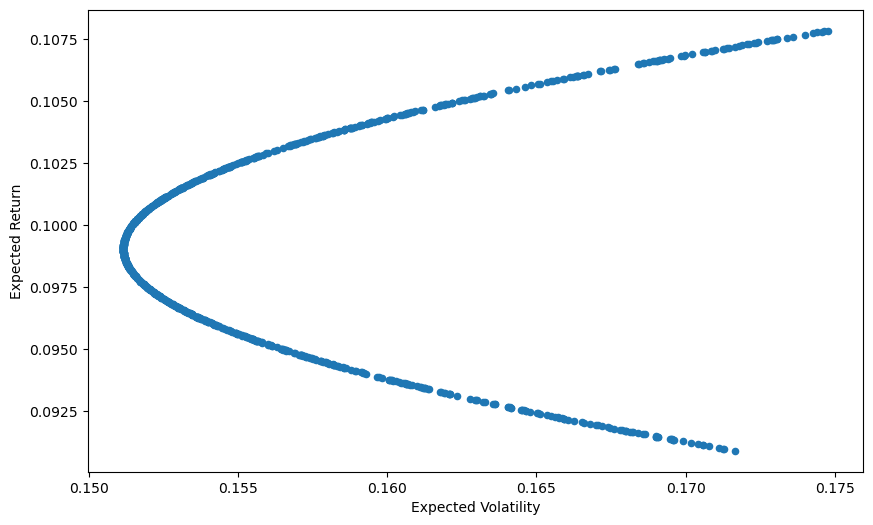

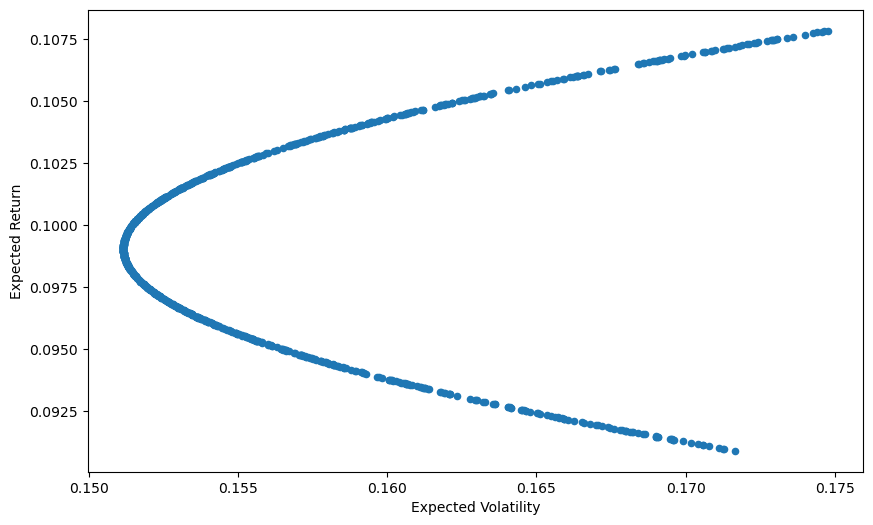

In [27]:
portfolios.plot(x='Volatility', y='Return',kind='scatter',figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()


In [19]:
tickers = ['PG', '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t, start = '2012-01-01', end = '2016-12-31')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
sec_returns = np.log(data/data.shift(1))

In [21]:
cov = sec_returns.cov() * 250
cov

,PG,^GSPC
PG,0.020409,0.010078
^GSPC,0.010078,0.016362


In [22]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.01007806227031876

In [23]:
market_var = sec_returns['^GSPC'].var()*250
market_var

0.016361631002308474

Beta: \beta_pg = sigma_pg,m / sigma_m

In [24]:
PG_beta = cov_with_market / market_var
PG_beta

0.6159570686380128

Calculate the expected return of P&G (CAPM):
r(i) = r_f + \beta_pg(r_m - r_f) #(r_m - r_f) is risk premium
r_f - risk free rate
r_i rate of return of the stock
sigma is always standard deviation, so sigma squared is variance

In [25]:
PG_er = 0.025 + PG_beta * 0.05
PG_er

0.05579785343190064

Sharpe ratio : s = (r_i - r_f) / sigma_i

In [26]:
Sharpe = (PG_er - 0.025) / (sec_returns['PG'].std() * 250 ** 0.5)
Sharpe

0.21558078185970775